# SVI minibatch variation

In [1]:
from pCMF.misc import utils
from pCMF.models.pcmf import cavi, svi

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

np.random.seed(1)

# plt.style.use('ggplot')

In [2]:
T = 60.
S = 1.

In [3]:
# Experiment parameters
N = 1000 # number of observations
P = 20 # observation space dimensionality
K = 10 # latent space dimensionality
C = 2 # number of clusters

# Generate data set
z_p = 0.5
eps = 5.
Y, D, X, R, V, U, clusters = utils.generate_data(N, P, K, C=C, zero_prob=z_p,
                                                 eps=eps, return_all=True)

Y_train, Y_test, U_train, U_test, c_train, c_test = train_test_split(Y, U.T, clusters, test_size=0.2, random_state=42)

In [4]:
# Run PCA
pca_U = PCA(n_components=K).fit_transform(np.log(Y_train + 1.))
pca_pca = TSNE(n_components=2).fit_transform(pca_U)

In [5]:
# Run CAVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('PCMF:')
infcavi = cavi.CoordinateAscentVI(Y_train, alpha, beta, pi_D)
cavi_ll = infcavi.run_cavi(n_iterations=4000, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
cavi_U = infcavi.a[0] / infcavi.a[1] # VI estimate is the mean of the variational approximation
cavi_pca = TSNE(n_components=2).fit_transform(cavi_U)

PCMF:
Iteration 55/4000. Log-likelihood: 29.514. Elapsed: 61 seconds


In [6]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('Stochastic PCMF:')
infsvi1 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi1_ll = infsvi1.run_svi(n_iterations=4000000, minibatch_size=1, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi1_U = infsvi1.a[0] / infsvi1.a[1] # VI estimate is the mean of the variational approximation
svi1_pca = TSNE(n_components=2).fit_transform(svi1_U)

Stochastic PCMF:
Iteration 15986/4000000. Log-likelihood: 27.499. Elapsed: 60 seconds


In [7]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('Stochastic PCMF:')
infsvi50 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi50_ll = infsvi50.run_svi(n_iterations=4000000, minibatch_size=50, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi50_U = infsvi50.a[0] / infsvi50.a[1] # VI estimate is the mean of the variational approximation
svi50_pca = TSNE(n_components=2).fit_transform(svi50_U)

Stochastic PCMF:
Iteration 659/4000000. Log-likelihood: 25.871. Elapsed: 60 seconds


In [8]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('Stochastic PCMF:')
infsvi100 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi100_ll = infsvi100.run_svi(n_iterations=4000, minibatch_size=100, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi100_U = infsvi100.a[0] / infsvi100.a[1] # VI estimate is the mean of the variational approximation
svi100_pca = TSNE(n_components=2).fit_transform(svi100_U)

Stochastic PCMF:
Iteration 322/4000. Log-likelihood: 30.113. Elapsed: 60 seconds


In [9]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('Stochastic PCMF:')
infsvi500 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi500_ll = infsvi500.run_svi(n_iterations=4000, minibatch_size=500, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi500_U = infsvi500.a[0] / infsvi500.a[1] # VI estimate is the mean of the variational approximation
svi500_pca = TSNE(n_components=2).fit_transform(svi500_U)

Stochastic PCMF:
Iteration 67/4000. Log-likelihood: 29.999. Elapsed: 60 seconds


In [12]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('Stochastic PCMF:')
infsvi1000 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi1000_ll = infsvi1000.run_svi(n_iterations=4000, minibatch_size=Y_train.shape[0], empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi1000_U = infsvi1000.a[0] / infsvi1000.a[1] # VI estimate is the mean of the variational approximation
svi1000_pca = TSNE(n_components=2).fit_transform(svi1000_U)

Stochastic PCMF:
Iteration 40/4000. Log-likelihood: 28.036. Elapsed: 61 seconds


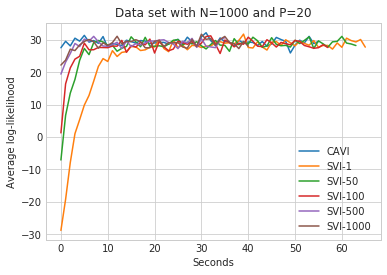

In [14]:
plt.plot(cavi_ll[1], label='CAVI')
plt.plot(svi1_ll[1], label='SVI-1')
plt.plot(svi50_ll[1], label='SVI-50')
plt.plot(svi100_ll[1], label='SVI-100')
plt.plot(svi500_ll[1], label='SVI-500')
plt.plot(svi1000_ll[1], label='SVI-1000')
plt.ylabel('Average log-likelihood')
plt.xlabel('Seconds')
plt.title('Data set with N={} and P={}'.format(N, P))
plt.legend()
plt.show()

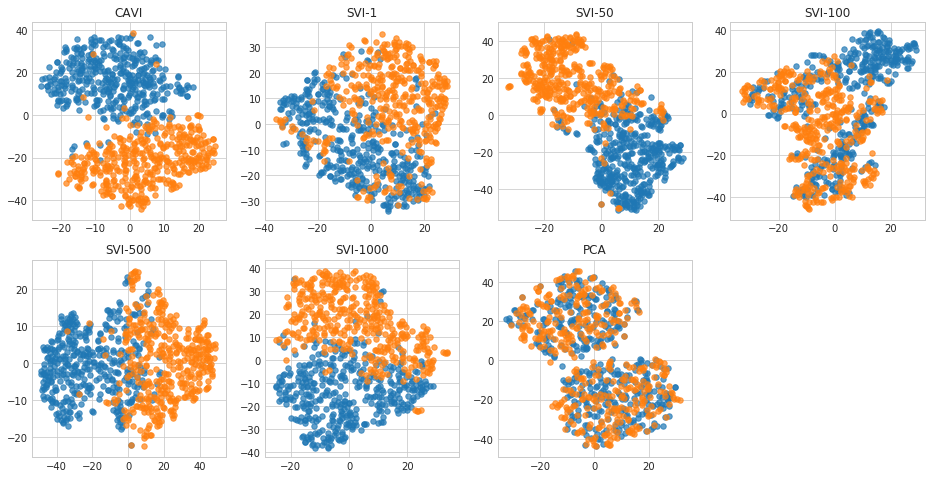

In [21]:
U_list = [cavi_pca, svi1_pca, svi50_pca, svi100_pca, svi500_pca, svi1000_pca, pca_pca]
title_list = ['CAVI', 'SVI-1', 'SVI-50', 'SVI-100', 'SVI-500', 'SVI-1000', 'PCA']

n_results = len(U_list)

assert len(U_list) == len(title_list)

fig = plt.figure(figsize=(16, 8))

s = 30
alpha = 0.7
labels=None
for i in range(len(U_list)):
    ax = plt.subplot(2, 4, i+1)
    handlers = []
    for c in range(C):
        h = ax.scatter(U_list[i][c_train==c, 0], U_list[i][c_train==c, 1], s=s, alpha=alpha)
        handlers.append(h)
    if labels is not None:
        ax.legend(handlers, labels, scatterpoints=1)
    plt.title(title_list[i])
plt.show()

In [22]:
true_silh = silhouette_score(U_train, c_train)
# pcmf_silh = silhouette_score(pcmf_U, c_train)
# pcmfeb_silh = silhouette_score(pcmfeb_U, c_train)
cavi_silh = silhouette_score(cavi_U, c_train)
svi1_silh = silhouette_score(svi1_U, c_train)
svi50_silh = silhouette_score(svi50_U, c_train)
svi100_silh = silhouette_score(svi100_U, c_train)
svi500_silh = silhouette_score(svi500_U, c_train)
svi1000_silh = silhouette_score(svi1000_U, c_train)
pca_silh = silhouette_score(pca_U, c_train)

scores = {'SVI-1': svi1_silh, 'SVI-50': svi50_silh, 'SVI-100': svi100_silh, 
          'SVI-500': svi500_silh, 'SVI-1000': svi1000_silh, 'PCA': pca_silh}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Silhouette scores (higher is better):')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))
    
print('\nSilhouette of true U:')
print('%0.3f' % true_silh)

Silhouette scores (higher is better):
- SVI-50: 0.258
- SVI-500: 0.197
- SVI-1000: 0.17
- SVI-1: 0.108
- SVI-100: 0.0717
- PCA: 0.00441

Silhouette of true U:
0.551
